# Introduction : les importations et ouverture du fichier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("qualite-air.json")

In [3]:
data.head(1)

,dateheure,nofra1,n2fra1,10fra1,c2fra1,tfra1,hyfra1
0,2023-09-18T02:00:00+02:00,4,18,25,449,"26,9",56


In [4]:
data = data.stack().str.replace(',','.').unstack()

#### j'avais un problème avec les histogrammes plus bas, je pensais que c'était à cause des virgules pour mes températures et l'humidité donc j'ai modifié tout le documents en remplaçant les virgules par des points => ce sont dorénavant des float

In [5]:
data.head(10)

,dateheure,nofra1,n2fra1,10fra1,c2fra1,tfra1,hyfra1
0,2023-09-18T02:00:00+02:00,4,18,25,449,26.9,56
1,2023-09-18T01:00:00+02:00,4,18,36,466,27.4,56.7
2,2023-09-18T00:00:00+02:00,11,54,58,491,27.9,56.9
3,2023-09-17T23:00:00+02:00,6,45,42,482,27.7,54.7
4,2023-09-17T22:00:00+02:00,4,41,39,479,27.7,54.1
5,2023-09-17T21:00:00+02:00,3,25,34,480,27.8,53.8
6,2023-09-17T20:00:00+02:00,2,13,29,475,27.8,52.8
7,2023-09-17T19:00:00+02:00,2,11,42,508,27.7,53.6
8,2023-09-17T18:00:00+02:00,2,13,43,530,27.5,53.7
9,2023-09-17T17:00:00+02:00,3,19,43,526,27.2,53.4


In [6]:
data.head(2)

,dateheure,nofra1,n2fra1,10fra1,c2fra1,tfra1,hyfra1
0,2023-09-18T02:00:00+02:00,4,18,25,449,26.9,56
1,2023-09-18T01:00:00+02:00,4,18,36,466,27.4,56.7


In [7]:
data.shape

(93498, 7)

## première tentative : renommer les colonnes - échec ... :(

In [8]:
datapropre = data.rename(axis = "columns", mapper = {"c2fra1" : "CO2"})

In [9]:
datapropre = data.rename(axis = "columns", mapper = {"tfra1" : "temperature"})

In [10]:
datapropre = data.rename(axis = "columns", mapper = {"n2fra1" : "NO2"})

In [11]:
datapropre = data.rename(axis = "columns", mapper = {"nofra1" : "NO"})

In [12]:
datapropre.head(5)

,dateheure,NO,n2fra1,10fra1,c2fra1,tfra1,hyfra1
0,2023-09-18T02:00:00+02:00,4,18,25,449,26.9,56
1,2023-09-18T01:00:00+02:00,4,18,36,466,27.4,56.7
2,2023-09-18T00:00:00+02:00,11,54,58,491,27.9,56.9
3,2023-09-17T23:00:00+02:00,6,45,42,482,27.7,54.7
4,2023-09-17T22:00:00+02:00,4,41,39,479,27.7,54.1


#### MAIS seulement une seule colonne a changé de nom => j'écrase ma variable datapropre à chaque fois, ce n'est donc pas ce que je veux

## deuxième tentative : renommer les colonnes - succès !! ;) 

In [13]:
datap = data.rename(axis = "columns", mapper = {"c2fra1" : "CO2","tfra1" : "temperature","n2fra1" : "NO2","nofra1" : "NO", "hyfra1" : "humidité"})

In [14]:
datap.head(5)

,dateheure,NO,NO2,10fra1,CO2,temperature,humidité
0,2023-09-18T02:00:00+02:00,4,18,25,449,26.9,56
1,2023-09-18T01:00:00+02:00,4,18,36,466,27.4,56.7
2,2023-09-18T00:00:00+02:00,11,54,58,491,27.9,56.9
3,2023-09-17T23:00:00+02:00,6,45,42,482,27.7,54.7
4,2023-09-17T22:00:00+02:00,4,41,39,479,27.7,54.1


# Analyse sur une journée

#### j'affiche les données du 17 septembre 2023 (de minuit à minuit)

In [15]:
dataJour = datap.iloc[2 : 26 , 1:7] #je veux juste le premier jour

In [16]:
dataJour1 = pd.DataFrame(dataJour)

In [17]:
dataJour1["heure"] = [i for i in range(24,0,-1)]

In [18]:
dataJour1.dtypes

NO             object
NO2            object
10fra1         object
CO2            object
temperature    object
humidité       object
heure           int64
dtype: object

#### je me suis rendue compte que les températures étaient des 'objects' et non des "float" donc les histogrammes ne m'affichaient pas ce que je voulais ...

In [19]:
dataJour1.temperature = pd.to_numeric(dataJour1.temperature)
dataJour1.NO = pd.to_numeric(dataJour1.NO)
dataJour1.NO2 = pd.to_numeric(dataJour1.NO2)
dataJour1.CO2 = pd.to_numeric(dataJour1.CO2)
dataJour1.humidité = pd.to_numeric(dataJour1.humidité)

In [20]:
dataJour1.dtypes

NO               int64
NO2              int64
10fra1          object
CO2              int64
temperature    float64
humidité       float64
heure            int64
dtype: object

#### je vais comparer le 17 septembre 2023 au 17 septembre 2022 et au 17 septembre 2013 (pour vraiment voir des différences)

In [21]:
data_2022 = pd.read_json("qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.json")
data_2022 = data_2022.stack().str.replace(',','.').unstack()
data_2022_df = pd.DataFrame(data_2022)
data_2022_df.tfra1 = pd.to_numeric(data_2022_df.tfra1)
data_2022_df["heure"] = [i for i in range(24,0,-1)]
data_2022_df.head()



data_2013 = pd.read_json("2013-qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.json")
data_2013 = data_2013.stack().str.replace(',','.').unstack()
data_2013_df = pd.DataFrame(data_2013)
data_2013_df.tfra1 = pd.to_numeric(data_2013_df.tfra1)
data_2013_df["heure"] = [i for i in range(24,0,-1)]
data_2013_df.head()

,dateheure,nofra1,n2fra1,10fra1,c2fra1,tfra1,hyfra1,heure
0,2013-09-17T23:00:00+02:00,NaN,NaN,NaN,NaN,21.6,65.3,24
1,2013-09-17T22:00:00+02:00,NaN,NaN,NaN,NaN,21.3,63.6,23
2,2013-09-17T21:00:00+02:00,NaN,NaN,NaN,NaN,21.1,62.3,22
3,2013-09-17T20:00:00+02:00,NaN,NaN,NaN,NaN,20.8,61.8,21
4,2013-09-17T19:00:00+02:00,NaN,NaN,NaN,NaN,20.6,58.1,20


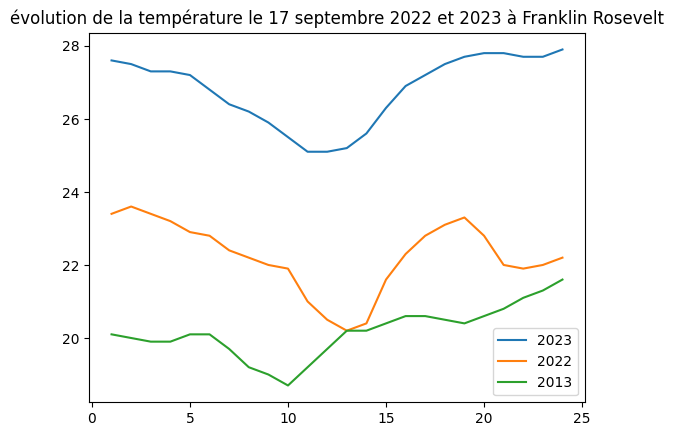

In [22]:
plt.figure(1)
plt.plot(dataJour1.heure,dataJour1.temperature, label = "2023")
plt.plot(data_2022_df.heure,data_2022_df.tfra1,label = "2022")
plt.plot(data_2013_df.heure,data_2013_df.tfra1,label = "2013")
plt.legend()
plt.title("évolution de la température le 17 septembre 2022 et 2023 à Franklin Rosevelt")


#plt.figure(2)
#plt.plot(dataJour1.heure,dataJour1.humidité)
#plt.title("évolution de l'humidité le 17 septembre 2023 à Franklin Rosevelt")

plt.show() 

#### on voit clairement la tendance : il fait de plus en plus chaud à Franklin Rosevelt en septembre - une augmentation de presque 6 degrés en 10 ans !! 

# Maximum de pollution dans une journée

![Mon Image](janco.jpg)

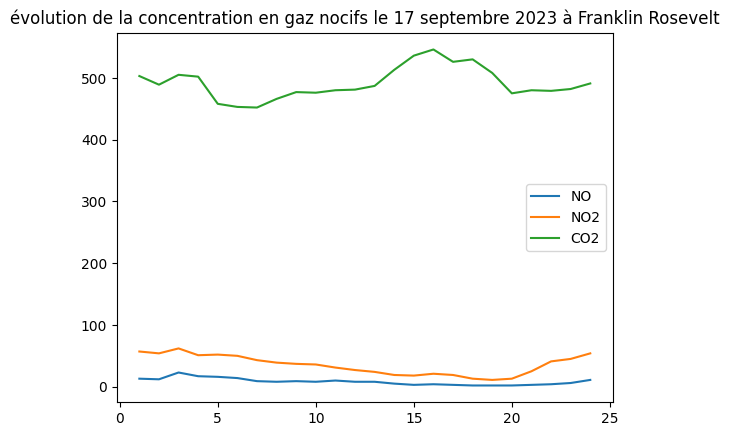

In [23]:
plt.plot(dataJour1.heure,dataJour1.NO, label = "NO")
plt.plot(dataJour1.heure,dataJour1.NO2, label = "NO2")
plt.plot(dataJour1.heure,dataJour1.CO2, label = "CO2")

plt.title("évolution de la concentration en gaz nocifs le 17 septembre 2023 à Franklin Rosevelt")
plt.legend()
plt.show()

In [24]:
max(dataJour1.CO2)

546

In [25]:
dataJour1_CO2 = dataJour1.set_index("CO2")
dataJour1_CO2

,NO,NO2,10fra1,temperature,humidité,heure
CO2,,,,,,
491,11,54,58,27.9,56.9,24
482,6,45,42,27.7,54.7,23
479,4,41,39,27.7,54.1,22
480,3,25,34,27.8,53.8,21
475,2,13,29,27.8,52.8,20
508,2,11,42,27.7,53.6,19
530,2,13,43,27.5,53.7,18
526,3,19,43,27.2,53.4,17
546,4,21,69,26.9,53.3,16


##### je vois donc que le maximum de pollution a été atteint à 16h de l'après midi, c'est ce que je pouvais lire sur le graphique également

# Analyse sur un an

#### il y a beaucoup de données, je veux comparer les températures et les concentrations de différents gaz dans l'air à la MÊME HEURE tous les jours 

In [26]:
dataTemp = datap.iloc[10 : 1000 : 24 , [0,5]] #je veux la température à 16h (c'est le pic de pollution déterminé précédemment)

In [27]:
dataTemp1 = pd.DataFrame(dataTemp)

#### je transforme le tableau en data frame afin de créer un histogramme

In [28]:
dataTemp1.dateheure = pd.to_datetime(dataTemp1.dateheure)

In [29]:
dataTemp1.temperature = pd.to_numeric(dataTemp1.temperature, errors='coerce')

In [30]:
dataTemp1.head(10)

,dateheure,temperature
10,2023-09-17 16:00:00+02:00,26.9
34,2023-09-16 16:00:00+02:00,26.6
58,2023-09-15 16:00:00+02:00,26.6
82,2023-09-14 16:00:00+02:00,26.3
106,2023-09-13 16:00:00+02:00,26.2
130,2023-09-12 16:00:00+02:00,26.2
154,2023-09-11 16:00:00+02:00,28.8
178,2023-09-10 16:00:00+02:00,NaN
202,2023-09-09 16:00:00+02:00,NaN
226,2023-09-08 16:00:00+02:00,NaN


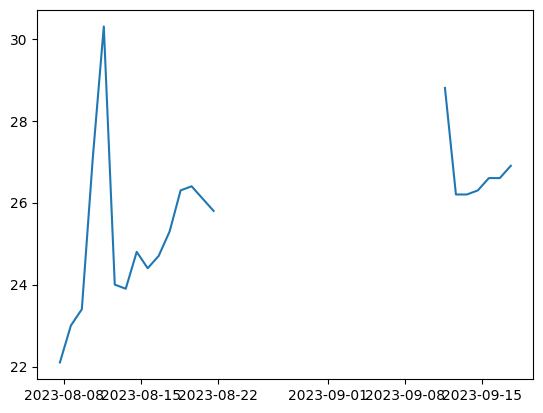

In [31]:
plt.plot(dataTemp1.dateheure, dataTemp1.temperature, label = "évolution de la température à 16h sur un an")
plt.show()

#### il manque beaucoup de données => c'est impossible d'avoir une vision globale de l'évolution de la température sur un an ... 

# Conclusion

##### j'ai étudié l'évolution de la température et d'autres données sur une journée en la comparant à d'autres années afin de mettre en lumière le réchauffement climatique
##### puis j'ai étudié l'évolution de la température sur un an, ce qui n'a pas été très concluant à cause du manque de données dans certains cas... 